In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_excel(r'Data Model - Pizza Sales.xlsx')

In [40]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [6]:
df.shape

(48620, 12)

In [7]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

## What days and times do we tend to be the busiest

<AxesSubplot:>

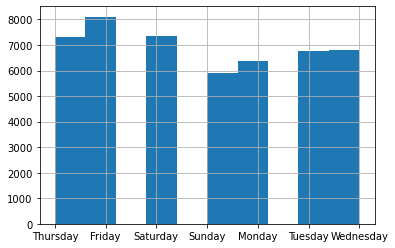

In [16]:
#first lets get the week column
week_day = df['order_date'].dt.day_name()
week_day.hist()

In [11]:
df['order_date'].nunique()

358

## How many pizzas are we making during peak periods

In [17]:
#now what are peak periods

In [33]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

<AxesSubplot:>

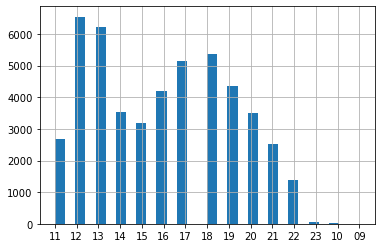

In [48]:
df['hour'] = df['order_time'].astype('str').str[:2]
df['hour'].hist(bins=30)

## from the above graph lets take 12-2pm and 5-8pm are the peak hours

In [60]:
df.groupby(['order_date','hour'])['quantity'].sum().to_frame().reset_index(level=['order_date','hour']).groupby('hour')['quantity'].mean()

hour
09     4.000000
10     2.250000
11     8.241692
12    18.980392
13    17.913408
14    10.352436
15     9.059155
16    11.907303
17    14.596639
18    15.173669
19    12.341737
20    10.039773
21     7.463343
22     5.021739
23     2.615385
Name: quantity, dtype: float64

## what are our best and worst selling pizzas

In [50]:
df['pizza_name'].nunique()

32

In [51]:
df['pizza_name'].value_counts()

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

## Whats our average order value

In [61]:
df['total_price'].mean()

16.82147367338529

## How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

In [65]:
df['pizza_size'].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

In [89]:
nop = {'S':1,'M':2,'L':4,'XL':5,'XXL':6}

In [90]:
df['nop'] = df['pizza_size'].map(nop)

In [96]:
df.head(10)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,hour,nop
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,2
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,2
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,4
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,4
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,2
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,11,4
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,12,2
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,12,4
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,12,2
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,12,2


In [113]:
df.groupby(['order_date','hour'])['nop'].sum().mean()

29.15546519971299

In [104]:
gp = df.groupby(['order_date','hour'])['nop'].sum()
gp

order_date  hour
2015-01-01  11      18
            12      35
            13      95
            14      38
            15      35
                    ..
2015-12-31  19      63
            20      40
            21      16
            22       4
            23       1
Name: nop, Length: 4181, dtype: int64

In [107]:
gp[gp>60] = 60

In [111]:
gp.median()

26.0

In [112]:
gp.mean()

28.050705572829468

<AxesSubplot:>

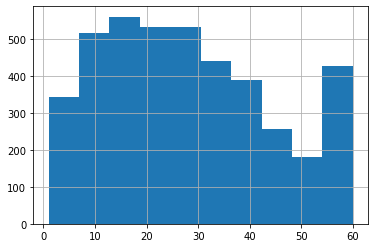

In [114]:
gp.hist()

In [94]:
df['order_id'].tail()

48615    21348
48616    21348
48617    21348
48618    21349
48619    21350
Name: order_id, dtype: int64